In [3]:
import numpy as np
import scipy as sp
import os, sys,glob, copy
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# load CCG data and cluster meta data

In [11]:
mouse_ID = '388523'

# 1. load df
basepath = '/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/example_388523/'
df_tmp = pd.read_csv(basepath+'mouse'+mouse_ID+'_cortex_meta.csv')
df_tmp = df_tmp[df_tmp.FR>2]
df_tmp = df_tmp.reset_index()
# load CCG

# load RF onscreen matrix
X = np.load(basepath+'mouse'+mouse_ID+'_adjacency_matrix_RF.npy')
# load RF onscreen cluster 
df = pd.read_csv(basepath+'mouse'+mouse_ID+'_meta_cluster_RF.csv')

select_idx = []
for idx, row in df_tmp.iterrows():
    probe_id=row['probe_id']
    unit_id=row['unit_id']
    if unit_id in df[df.probe_id==probe_id].unit_id.values:
        select_idx.append(idx)      
df_tmp=df_tmp.iloc[select_idx]

ccg_RF = np.load(basepath+'ccg.npy')


In [5]:
labels = df.cluster.values

In [6]:
X.shape

(164, 164)

In [ ]:
# plot averaged population CCG between cluster 2 (FF) units and the 3 clusters
# between cluster 3 (FB) units and the 3 clusters

(6084, 200)
(4368, 200)
(2340, 200)
(4368, 200)
(3136, 200)
(1680, 200)
(2340, 200)
(1680, 200)
(900, 200)


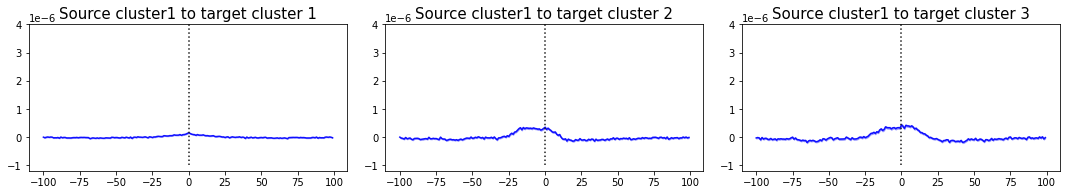

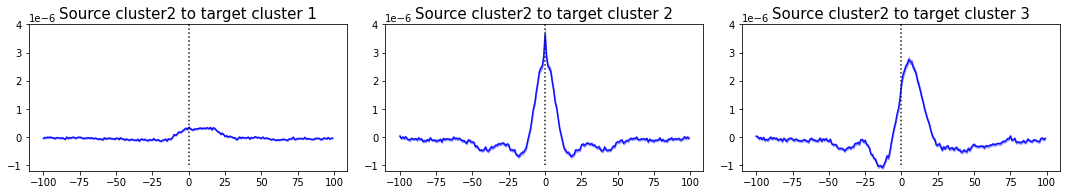

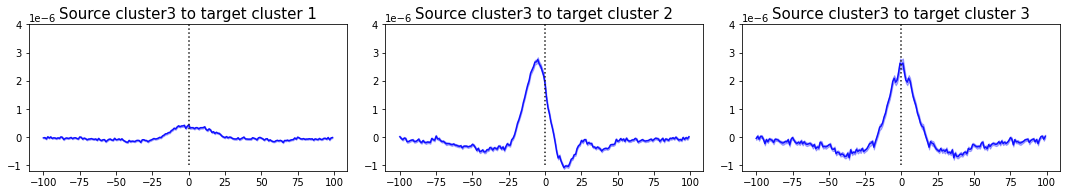

In [22]:
time=np.arange(-100, 100)
for idx_cluster in [1,2,3]:
    #idx_cluster=2
    subnetwork = ccg_RF[np.where(labels==idx_cluster)[0], :, :]

    plt.figure(figsize=(15,5))
    plt.subplot(231)
    tmp=np.fliplr(np.reshape(subnetwork[:, np.where(labels==1)[0], :], 
                             (subnetwork.shape[0]*len(np.where(labels==1)[0]), 200)))
    print(tmp.shape)
    #plt.plot(np.arange(-100, 100),tmp)
    pu.plot_fill_between(tmp, time)
    plt.title('Source cluster'+str(idx_cluster)+' to target cluster 1', fontsize=15)
    plt.plot([0,0], [-0.000001, 0.000004], ':k')
    plt.ylim([-1.2e-6, 4e-6])

    plt.subplot(232)
    tmp=np.fliplr(np.reshape(subnetwork[:, np.where(labels==2)[0], :], 
                             (subnetwork.shape[0]*len(np.where(labels==2)[0]), 200)))
    #plt.plot(np.arange(-100, 100),tmp)
    print(tmp.shape)
    pu.plot_fill_between(tmp, time)
    plt.title('Source cluster'+str(idx_cluster)+' to target cluster 2', fontsize=15)
    plt.plot([0,0], [-0.000001, 0.000004], ':k')
    plt.ylim([-1.2e-6, 4e-6])

    plt.subplot(233)
    tmp=np.fliplr(np.reshape(subnetwork[:, np.where(labels==3)[0], :], 
                             (subnetwork.shape[0]*len(np.where(labels==3)[0]), 200)))
    #plt.plot(np.arange(-100, 100),tmp)
    print(tmp.shape)
    pu.plot_fill_between(tmp, time)
    plt.title('Source cluster'+str(idx_cluster)+' to target cluster 3', fontsize=15)
    plt.plot([0,0], [-0.000001, 0.000004], ':k')
    plt.ylim([-1.2e-6, 4e-6])
    plt.tight_layout()
    


In [ ]:
# Waterfall plot for CCGs in each subnetwork sorted by weight values

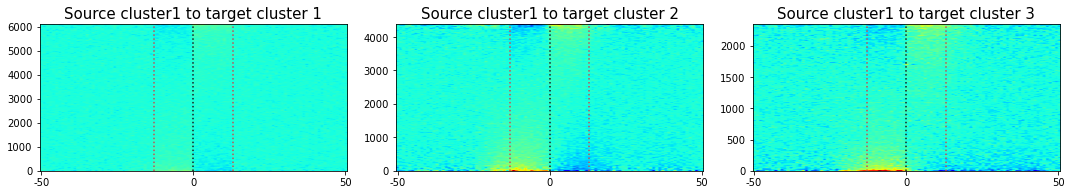

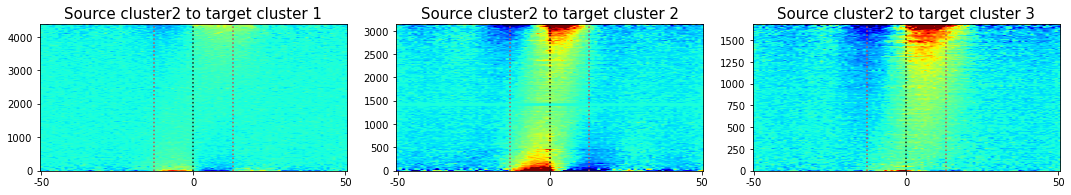

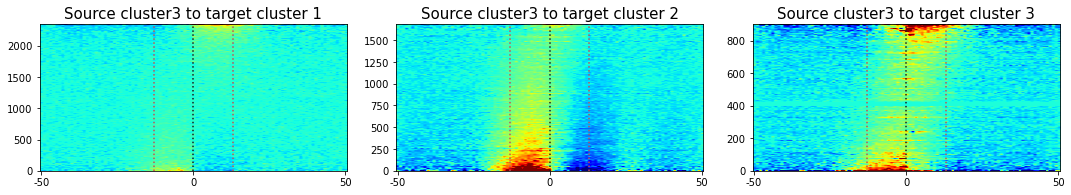

In [23]:
for idx_cluster in [1,2,3]:
    #idx_cluster=2
    subnetwork = ccg_RF[np.where(labels==idx_cluster)[0], :, :]
    subnetwork_X = X[np.where(labels==idx_cluster)[0], :]

    plt.figure(figsize=(15,5))
    plt.subplot(231)
    tmp_X = subnetwork_X[:, np.where(labels==1)[0]].flatten()
    tmp=np.fliplr(np.reshape(subnetwork[:, np.where(labels==1)[0], 49:150], 
                             (subnetwork.shape[0]*len(np.where(labels==1)[0]), 101)))
    #plt.plot(np.arange(-100, 100),tmp)
    plt.imshow(tmp[np.argsort(tmp_X),:], aspect='auto', cmap='jet', vmax=8e-6, vmin=-5e-6, origin='lower')
    plt.title('Source cluster'+str(idx_cluster)+' to target cluster 1', fontsize=15)
    plt.xticks([0,50,100],[-50,0,50])
    plt.plot([50-13,50-13], [0, len(tmp_X)-1], ':r')
    plt.plot([50+13,50+13], [0, len(tmp_X)-1], ':r')
    plt.plot([50,50], [0, len(tmp_X)-1], ':k')

    plt.subplot(232)
    tmp_X = subnetwork_X[:, np.where(labels==2)[0]].flatten()
    tmp=np.fliplr(np.reshape(subnetwork[:, np.where(labels==2)[0], 49:150], 
                             (subnetwork.shape[0]*len(np.where(labels==2)[0]), 101)))
    #plt.plot(np.arange(-100, 100),tmp)
    plt.imshow(tmp[np.argsort(tmp_X),:], aspect='auto', cmap='jet', vmax=8e-6, vmin=-5e-6, origin='lower')
    plt.title('Source cluster'+str(idx_cluster)+' to target cluster 2', fontsize=15)
    plt.xticks([0,50,100],[-50,0,50])
    plt.plot([50-13,50-13], [0, len(tmp_X)-1], ':r')
    plt.plot([50+13,50+13], [0, len(tmp_X)-1], ':r')
    plt.plot([50,50], [0, len(tmp_X)-1], ':k')

    plt.subplot(233)
    tmp_X = subnetwork_X[:, np.where(labels==3)[0]].flatten()
    tmp=np.fliplr(np.reshape(subnetwork[:, np.where(labels==3)[0], 49:150], 
                             (subnetwork.shape[0]*len(np.where(labels==3)[0]), 101)))
    #plt.plot(np.arange(-100, 100),tmp)
    plt.imshow(tmp[np.argsort(tmp_X),:], aspect='auto', cmap='jet', vmax=8e-6, vmin=-5e-6, origin='lower')
    plt.title('Source cluster'+str(idx_cluster)+' to target cluster 3', fontsize=15)
    plt.plot([50,50], [0, len(tmp_X)-1], ':k')
    plt.plot([50-13,50-13], [0, len(tmp_X)-1], ':r')
    plt.plot([50+13,50+13], [0, len(tmp_X)-1], ':r')
    plt.xticks([0,50,100],[-50,0,50])
    #plt.colorbar()
    plt.tight_layout()
    